# <span style='font-family:"Times New Roman"'> <span styel=''> This code will extract important features using Random Forest technique from National Bridge Inventory (NBI) dataset.

## <span style='font-family:"Times New Roman"'> <span styel=''>Loading required modules: 

In [1]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## <span style='font-family:"Times New Roman"'> <span styel=''>Turning off the warning about copying dataframe: 

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

## <span style='font-family:"Times New Roman"'> <span styel=''>Reading NBI dataset and dropping culverts since we are interested in bridges: 

In [3]:
#Reading the dataset 
nbi = pd.read_csv('NBI 2019.txt', sep=',', engine='python').drop([0])
#Dropping Culverts  
nbi = nbi[nbi["CULVERT_COND_062"] == "N"].reset_index()

## <span style='font-family:"Times New Roman"'> <span styel=''>Setting `y` matrix to be target values we are interested: Deck condition, Superstructure condition, and Substructure condition: 

In [4]:
y = nbi[["DECK_COND_058","SUPERSTRUCTURE_COND_059","SUBSTRUCTURE_COND_060"]]

## <span style='font-family:"Times New Roman"'> <span styel=''>Setting up training matrix `x` and dropping features from dataset that are not necessary. This step is solely based on my Civil Engineering background: 

In [5]:
x = nbi.drop(["ROUTE_NUMBER_005D","DIRECTION_005E","STRUCTURE_NUMBER_008",\
              "STATE_CODE_001","DECK_COND_058",\
              "SUPERSTRUCTURE_COND_059","SUBSTRUCTURE_COND_060",\
             "HIGHWAY_DISTRICT_002", "COUNTY_CODE_003","FEATURES_DESC_006A",\
             "PLACE_CODE_004","CRITICAL_FACILITY_006B","FACILITY_CARRIED_007","LOCATION_009",\
             "LRS_INV_ROUTE_013A","SUBROUTE_NO_013B",\
             "LAT_016","LONG_017","YEAR_ADT_030","RAILINGS_036A",\
             "TRANSITIONS_036B","APPR_RAIL_036C","APPR_RAIL_END_036D","HISTORY_037",\
             "NAVIGATION_038", "NAV_VERT_CLR_MT_039","NAV_HORR_CLR_MT_040",\
              "OPEN_CLOSED_POSTED_041", "LAT_UND_REF_055A", "LAT_UND_MT_055B","CHANNEL_COND_061",\
             "CULVERT_COND_062", "BRIDGE_IMP_COST_094","ROADWAY_IMP_COST_095",\
              "TOTAL_IMP_COST_096", "YEAR_OF_IMP_097","OTHER_STATE_CODE_098A",\
             "OTHER_STATE_PCNT_098B","OTHR_STATE_STRUC_NO_099","STRAHNET_HIGHWAY_100",\
             "PARALLEL_STRUCTURE_101","TEMP_STRUCTURE_103","HIGHWAY_SYSTEM_104","FEDERAL_LANDS_105",\
             "PERCENT_ADT_TRUCK_109","YEAR_OF_FUTURE_ADT_115","SUBMITTED_BY","FED_AGENCY"], axis=1)

#This line will transfer month and year to year value only since month would not be a suitable feature: 
for i in range (len(x.DATE_OF_INSPECT_090)):
    x.DATE_OF_INSPECT_090[i] = int(str(x.DATE_OF_INSPECT_090[i])[-2:])+2000

#Filling NAN with zeros
x = x.fillna(0)
#One-hot encoding: 
x = pd.get_dummies(x)

## <span style='font-family:"Times New Roman"'> <span styel=''>Splitting test and train date: 30 percent would go to test and 70 percent would go to train:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

## <span style='font-family:"Times New Roman"'> <span styel=''>Feature selection using Random Forest: 

In [7]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [8]:
selected_feat= X_train.columns[(sel.get_support())]

In [9]:
print("Number of selected features :")
print(len(selected_feat))

Number of selected features :
39


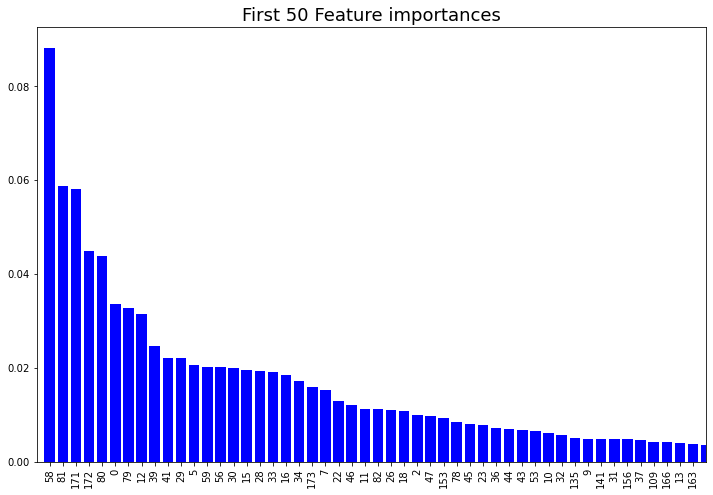

In [10]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize=(12,8))
plt.title("First 50 Feature importances", fontsize=18)
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(50), indices[0:50], rotation='vertical')
plt.xlim([-1, 50])
plt.show()